# Organizational Bias Exploration 
#### Pulling data from MediaBiasFactCheck.com and AllSides.com

Matthew Fishman, Practicum Milestone 1

In [2]:
import json, pandas as pd
from pandas.io.json import json_normalize

#Clean Data
dfAllSides = pd.read_json('AllSidesSources.json')
dfAllSidesTrans = dfAllSides.T
dfAllSidesTrans.index = dfAllSidesTrans.index.str.lower()
dfAllSidesTrans['rating'] = dfAllSidesTrans['rating'].str.lower()
dfAllSidesCleaned = dfAllSidesTrans[['rating','title']].sort_index()

#dfAllSidesCleaned

In [ ]:
#Figure out possible values
set(dfAllSidesCleaned.rating)

#{'center', 'lean left', 'lean right', 'left', 'mixed', 'right'}

In [3]:
#Clean Data
dfMBFC = pd.read_json('MBFCsourcesAll.json')
dfMBFCTrans = dfMBFC.T
dfMBFCTrans.index = dfMBFCTrans.index.str.lower()
dfMBFCSorted = dfMBFCTrans.sort_index()
dfMBFCCleaned = dfMBFCSorted[dfMBFCSorted.bias != '']
dfMBFCAdj = dfMBFCCleaned[['name','bias','Popularity']]

#Figure out possible values
#set(dfMBFCAdj.bias)
#{center', 'conspiracy', 'fake-news', 'left', 'left-center', 'pro-science', 'right', 'right-center', 'satire'}


In [4]:
#Drop non-political scale sources (about 900/2500)
dfMBFCNorm = dfMBFCAdj[(dfMBFCAdj.bias != 'conspiracy') & (dfMBFCAdj.bias != 'fake-news') & (dfMBFCAdj.bias !='pro-science') & (dfMBFCAdj.bias != 'satire')]
#dfMBFCNorm

In [5]:
#Normalize data, drop 'mixed' sites that give perspectives from both sides of the policial spectrum
dfAllSidesNorm = dfAllSidesCleaned.replace(['lean left', 'lean right'], ['left-center', 'right-center'])
dfAllSidesNorm = dfAllSidesNorm.rename(index=str, columns={"rating": "bias", "title": "name"})
dfAllSidesNorm = dfAllSidesNorm[dfAllSidesNorm.bias != 'mixed']
#dfAllSidesNorm

In [6]:
#get total ratings for AllSides
dfAllSidesNorm.shape

(210, 2)

In [ ]:
#get total ratings for AllSides
dfMBFCNorm.shape

In [7]:
#get number of agreed-upon ratings
dfMerged = pd.merge(dfAllSidesNorm, dfMBFCNorm, how='inner')
dfMerged = dfMerged.drop_duplicates()
dfMerged.shape
#dfMerged

(52, 3)

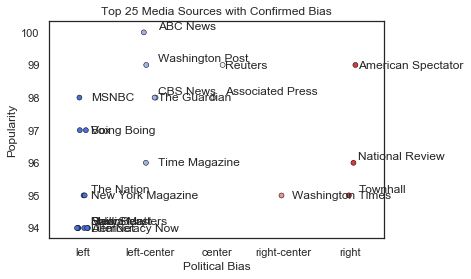

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

#Get most popular agreed-upon news sources
dfMergedPop = dfMerged.loc[dfMerged['Popularity'] > 93]

#Graph them
ax = sns.stripplot('bias', 'Popularity', data=dfMergedPop, 
                   order=['left', 'left-center', 'center', 'right-center', 'right'], 
                   palette=sns.diverging_palette(258, 12, n=5), edgecolor='black', linewidth=.5)
plt.title('Top 25 Media Sources with Confirmed Bias')
plt.xlabel('Political Bias')
plt.ylabel('Popularity')

#Label them
def label_point(category, y, val, ax):
    spacing = .1
    a = pd.concat({'x': category, 'y': y, 'val': val}, axis=1)
    for j, point in a.iterrows():
        ax.text(point['x']+.02, point['y']+spacing, str(point['val']))
        spacing *= -1


dfBiasLoc = dfMergedPop.bias
dfMergedPop.loc[dfMergedPop.bias == "left", 'pos'] = 0.1
dfMergedPop.loc[dfMergedPop.bias == "left-center", 'pos'] = 1.1
dfMergedPop.loc[dfMergedPop.bias == "center", 'pos'] = 2.1
dfMergedPop.loc[dfMergedPop.bias == "right-center", 'pos'] = 3.1
dfMergedPop.loc[dfMergedPop.bias == "right", 'pos'] = 4.1
label_point(dfMergedPop.pos, dfMergedPop.Popularity, dfMergedPop.name, plt.gca())  